# Voting classifiers

Even if all classifiers in an ensemble are weak, voting can improve strength drastically provided a sufficent number of weak, diverse classifiers. 

### Hard voting
Simply the majority vote/modal response.
This works by the law of large numbers. If there is a slightly greater chance an observation is going to be classified correctly as opposed to incorrectly. It should be classifed correctly more times than incorrectly in the ensemble. So by voting, we should be able to classify it correctly.

The best way to do this is to use very different algorithms to train these, as they will hopefully make different errors. 

### soft voting
Basically averaging proabilities
Most classifiers can output probabilities, but not all e.g. SVC. If we use these in the ensemble, we can average the probabilities out across classifiers, giving emenece to classifiers that are more certain of the correct class.  

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from yellowbrick.classifier import ClassificationReport

In [19]:
X,y = make_moons(n_samples=1000, noise=0.6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
ensemble = [("logistic", LogisticRegression()),
            ("forest", RandomForestClassifier()),
            ("svc", SVC(probability=True))]

hard_voting_clf = VotingClassifier(estimators=ensemble,
                                   voting="hard")

soft_voting_clf = VotingClassifier(estimators=ensemble,
                                   voting="soft")

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


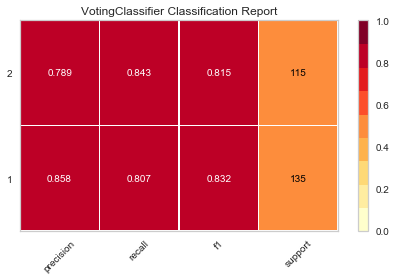

In [32]:
visualizer = ClassificationReport(hard_voting_clf,
                                  classes=["1","2"],
                                  support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


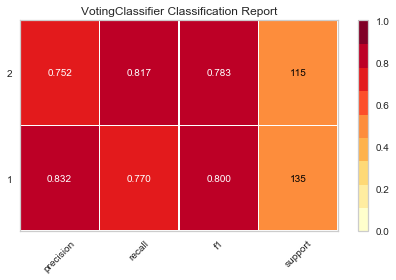

In [33]:
visualizer = ClassificationReport(soft_voting_clf,
                                  classes=["1","2"],
                                  support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


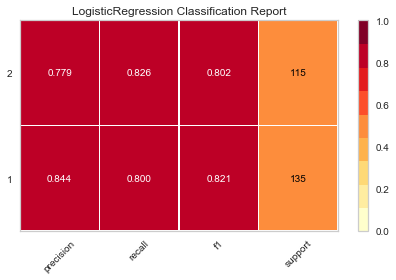

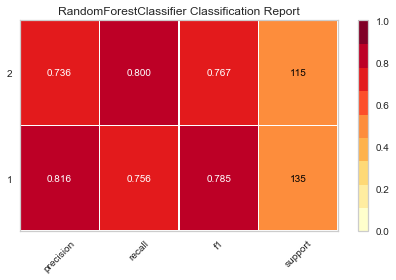

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


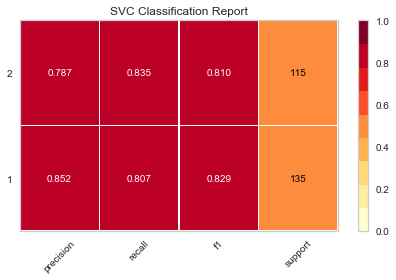

In [34]:
for name,clf in ensemble:
    visualizer = ClassificationReport(clf,
                                  classes=["1","2"],
                                  support=True)
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    g = visualizer.poof()  

we see that (hard) voting is better than all of these

## Bagging and pasting

Bagging uses the same algorithm, but trains them on different data. Bagging (bootstrap aggregating) is sampleing with replacement. Pasting is the same, but with random sampling without replacement.

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                           n_estimators=500,
                           max_samples=100,
                           bootstrap=True,
                           n_jobs=-1)

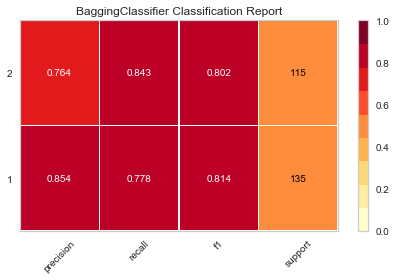

In [41]:
visualizer = ClassificationReport(bag_clf,
                                  classes=["1","2"],
                                  support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

Typically bagging means more bias than pasting as there is more varieation in the training data through re-sampling. This does act to reduce varience as models tend to be less correlated.

### out of bag evalutation

Since some of the values in the training data are resampled, 1/3rd is left out or out-of-bag.

This beasically gives us an evaluation set for free. 

### random patches and random subspaces

We don't just have to sample across observations, we can sample across features too. There are two ways of doing this.

- Patches; sample features and observations
- subspace; sample features but keep all observations

Basically trading increase in bias for lower varience.

# Random forests

Decision trees with bagging, with max samples set to the size of the training set.
The way random forest is different is that it takes the 'best' split from a random subset of features. Again trading hihger bias for lower varience.

## extremely random forests
Picks random thresholds rather than searching for the best split. Much faster to train. 

## Feature importance

How much do the nodes that use this feature reduce impurity on (weighted) average. This then scaled so the sum of all importances = 1. 

In [57]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()

X = iris["data"]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [49]:
rf_clf = RandomForestClassifier(n_estimators=500, random_state=42)

In [50]:
rf_clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [58]:
scores=[]
for name, score in zip(iris["feature_names"], rf_clf.feature_importances_):
    print(f"{name}: {score}")
    scores.append(score)
    
print(f"total: {np.sum(scores)}")

sepal length (cm): 0.11249225099876375
sepal width (cm): 0.02311928828251033
petal length (cm): 0.4410304643639577
petal width (cm): 0.4233579963547682
total: 1.0


## Boosting

### Adaboost
Short for adaptive boosting.

Trains trees incrementally, increases weights of misclassified items from previous trees' results. This means these difficult to classify points are given greate emphisis for future trees. This makes intuative sense as these points are often on or around class boundaries in feature space. So if you can get these points right, you solve the problem.

The main disadvantage is with sequential training this cannot be parrellelised, so does not scale as well.